# Title - FORECASTING FUEL EFFICIENCY BASED ON VEHICLE ATTRIBUTES

# Group Number - 21

# Team members with their roll numbers - 
# 1.Pratham Sayam - 22b4202
# 2.Ashish Kushwah - 22b4206
# 3.Devesh Bunkar - 22b4244
# 4.Rishi Bhande - 22b4222
# 5.Manoj Singh - 22b4209

# Link to video - https://drive.google.com/drive/folders/1isBucsooUQhRD167-C9dugeEpK-6aKuz?usp=sharing

# Link to the dataset - https://data.world/databeats/auto-mpg-data-set




### Scikit-learn provide a wide range of supervised and unsupervised learning alogrithms, regression and model selection.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Importing all imported libray which are used in this project.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm


### Reading excel of data with the help of Pandas

In [3]:
data = pd.read_csv("autos_mpg.csv",sep=',')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Dropping the car_name column because there is no such use in analysis. 

In [4]:
data = data.drop('car_name', axis=1)

data.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1


### Finding all the missing values in data

In [5]:
missing_values_data = data.isnull().sum()
print(missing_values_data)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### Drop the missing values from the data.

In [6]:
data.dropna(inplace=True)

### In my origin column, we assign cities rather than numbers.

In [7]:
data['origin'] = data['origin'].replace({1: 'Mumbai', 2:'Delhi', 3:'Banglore'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,Mumbai
1,15.0,8,350.0,165.0,3693,11.5,70,Mumbai
2,18.0,8,318.0,150.0,3436,11.0,70,Mumbai
3,16.0,8,304.0,150.0,3433,12.0,70,Mumbai
4,17.0,8,302.0,140.0,3449,10.5,70,Mumbai
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Mumbai
394,44.0,4,97.0,52.0,2130,24.6,82,Delhi
395,32.0,4,135.0,84.0,2295,11.6,82,Mumbai
396,28.0,4,120.0,79.0,2625,18.6,82,Mumbai


In [8]:
data = pd.get_dummies(data, columns=['origin'])
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Banglore,origin_Delhi,origin_Mumbai
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
5,15.0,8,429.0,198.0,4341,10.0,70,False,False,True
6,14.0,8,454.0,220.0,4354,9.0,70,False,False,True
7,14.0,8,440.0,215.0,4312,8.5,70,False,False,True
8,14.0,8,455.0,225.0,4425,10.0,70,False,False,True
9,15.0,8,390.0,190.0,3850,8.5,70,False,False,True


### Describe the mean, standard deviation, min, max, first quartile, second quartile, and third quartile.

In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Assigning two random variable for model and analyse. 


In [10]:
variable_1 = 'horsepower'
variable_2 = 'weight'

### Normally fitted random variable

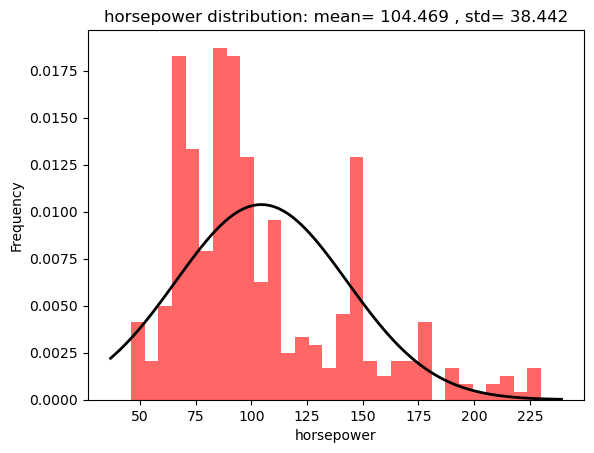

In [11]:
mean, std = norm.fit(data[variable_1])

plt.hist(data[variable_1], bins=30, density=True, alpha=0.6, color = 'red')
xmin, xmax = plt.xlim()
x_align = np.linspace(xmin, xmax, 100)
p_align = norm.pdf(x_align, mean, std)
plt.plot(x_align, p_align, 'k', linewidth=2)
plt.title(f'{variable_1} distribution: mean={mean: .3f} , std={std: .3f}')
plt.xlabel(variable_1)
plt.ylabel('Frequency')
plt.show()

## Hypothesis:

There is a significant correlation between the number of cylinders in a vehicle and its fuel efficiency(mpg).

### Defining the hypothesis:

- Null Hypothesis (H0): There is no significant correlation between the number of cylinders in a vehicle and ite fuel efficiency (mpg).

- Alternative Hypothesis (H1): There is a significant correlation between hte number of cylinders in a vehicle and its fuel efficiency(mpg).

In [12]:
correlation_coef = data['cylinders'].corr(data['mpg'])
testing_alpha = 0.05

if abs(correlation_coef) > testing_alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

print("Correlation Coefficient:", correlation_coef)

Reject the Null Hypothesis
Correlation Coefficient: -0.7776175081260214


#### Plotting the scatter plot for two random variable

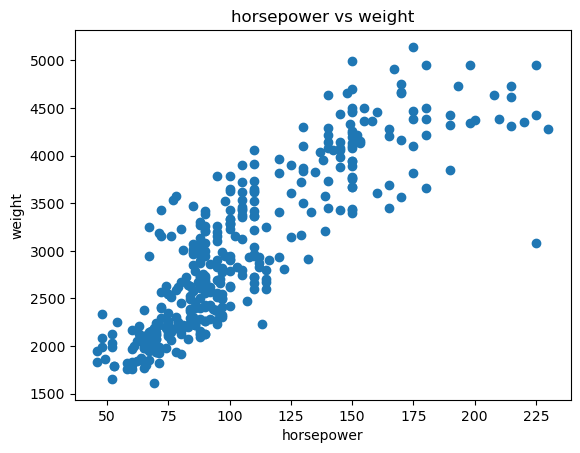

In [13]:
plt.scatter(data[variable_1], data[variable_2])
plt.title(f'{variable_1} vs {variable_2}')
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.show()

#### Generating pair plot of data

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


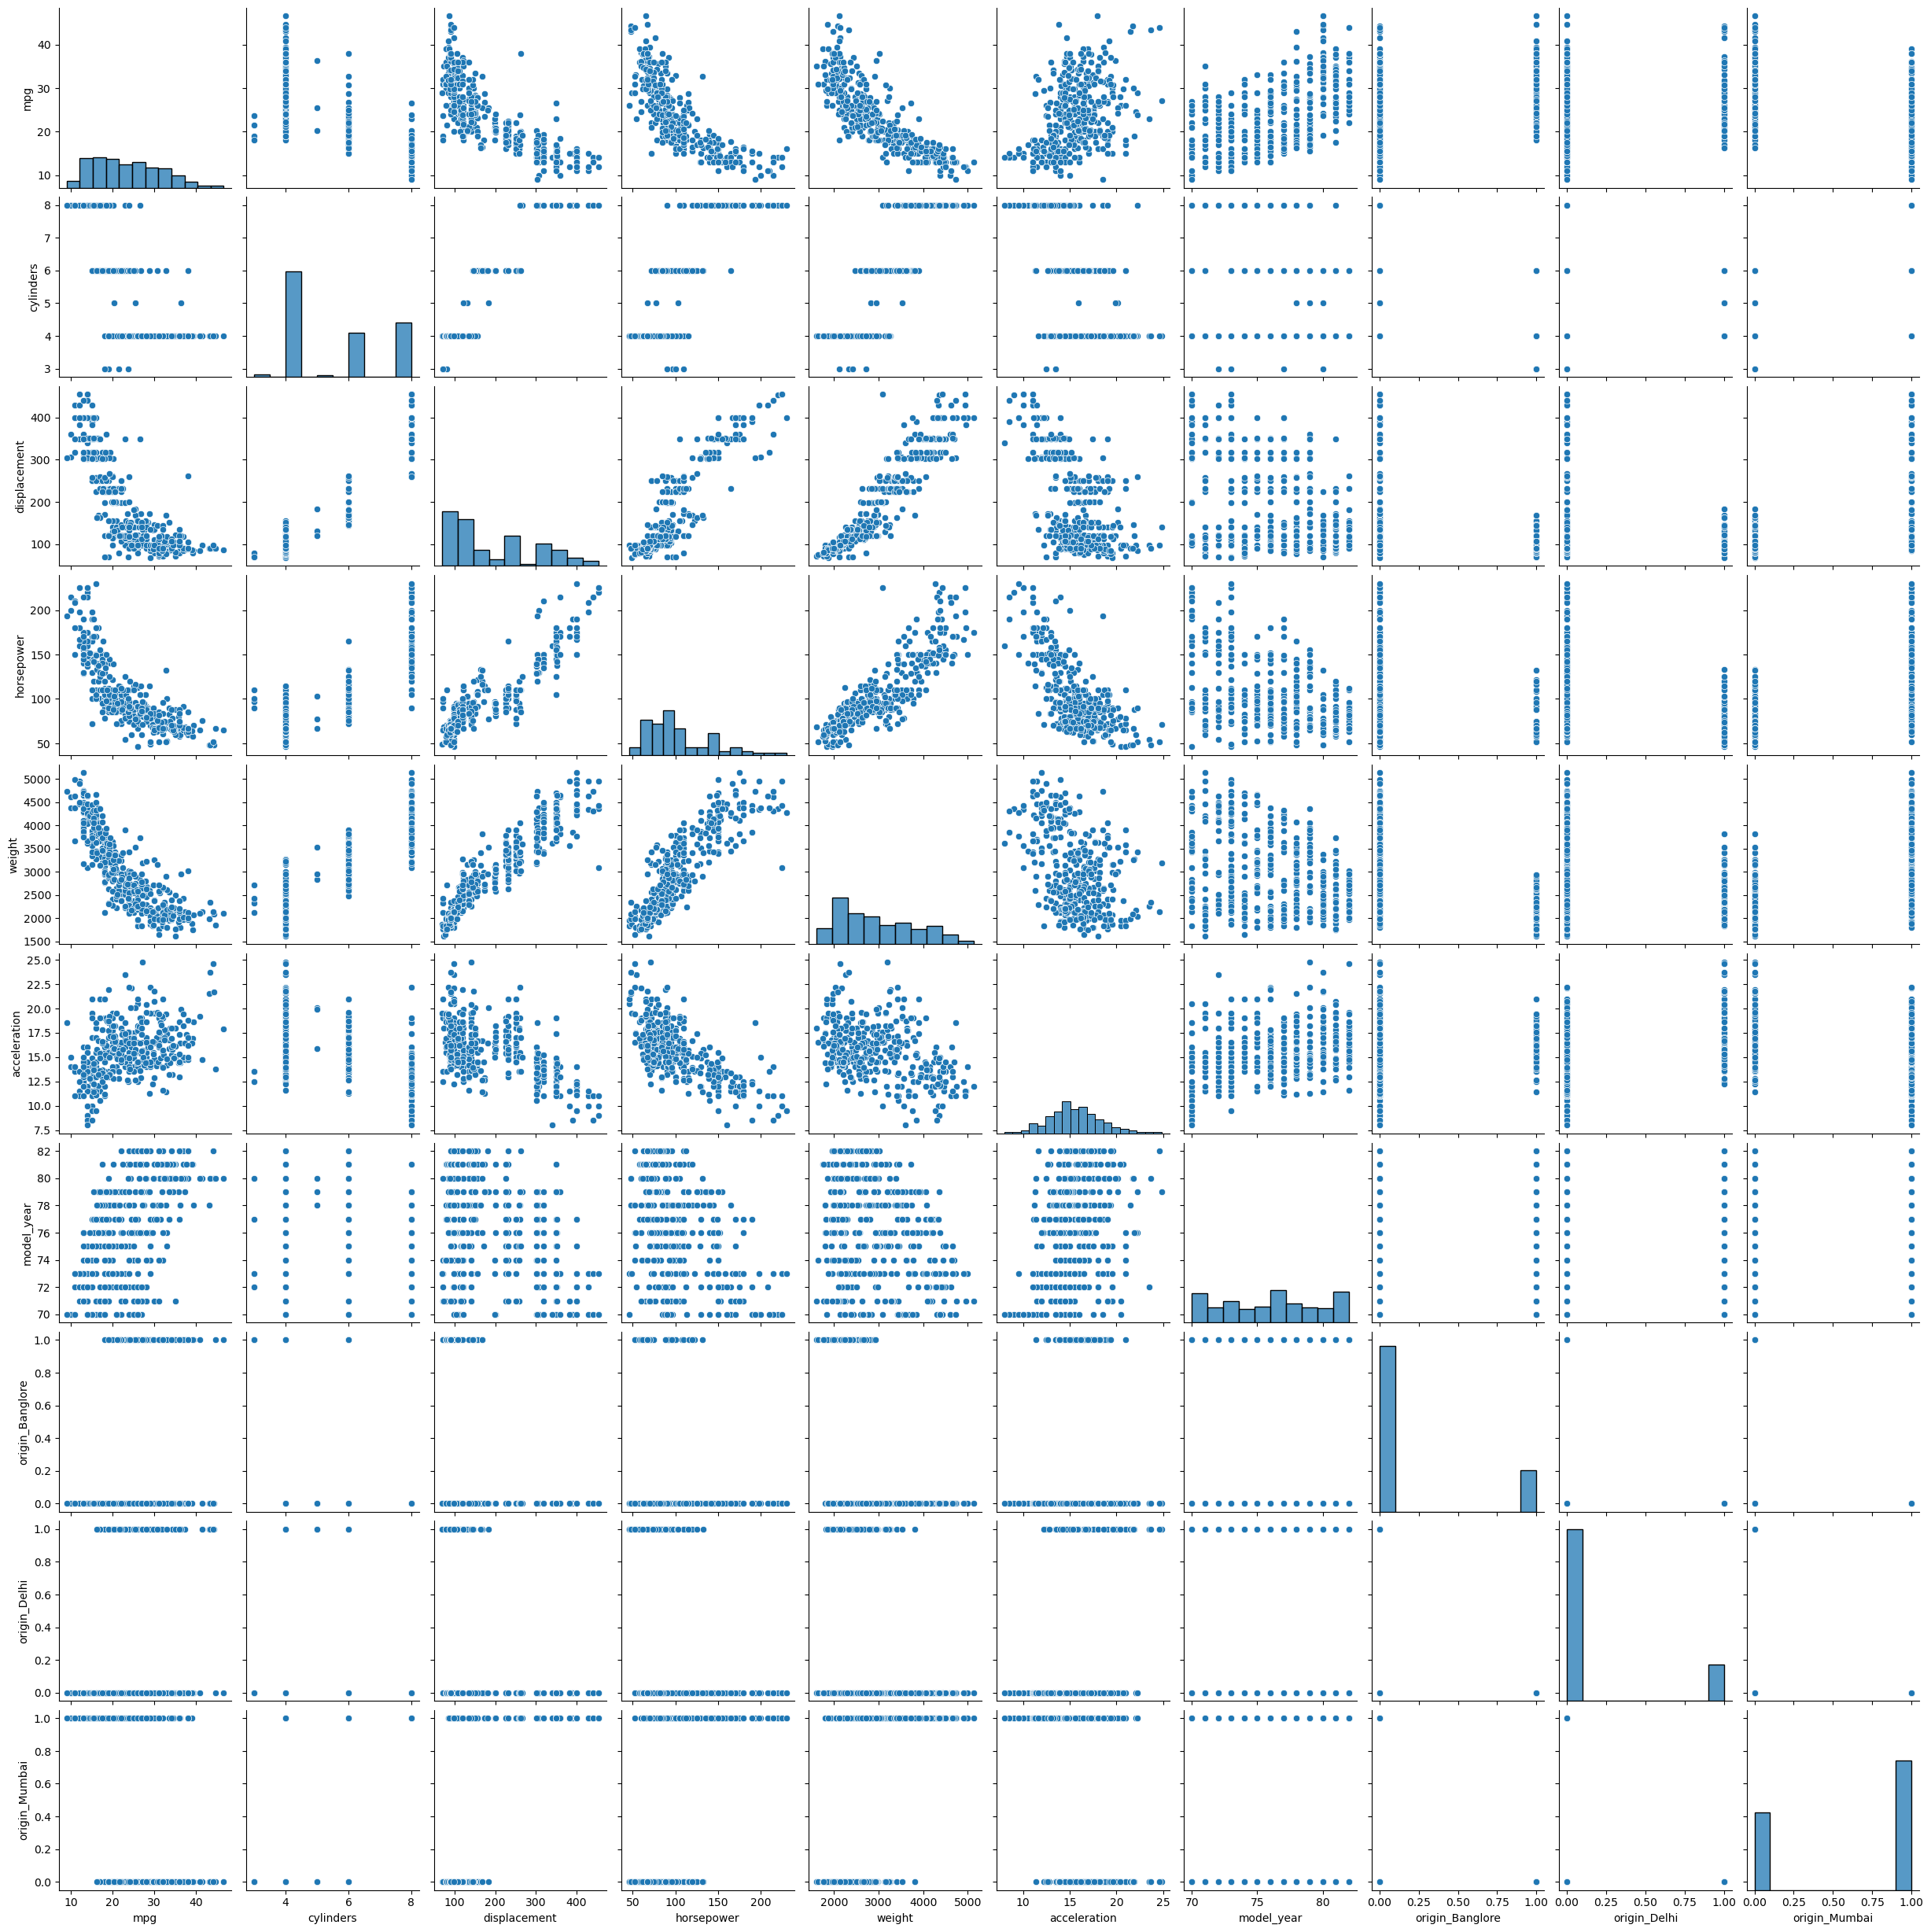

In [14]:
sns.pairplot(data)
plt.show()

### Analysis of Data

- Data doesn't look like it's evenly spread out across different factors, except for 'Acc'(acceleration).
- When we closely look at 'mpg' and other factors, they don't seem to follow a straight line.
- when we compare 'mpg' and 'hp'(horsepower), we notice that the difference in 'mpg' aren't consistent, which might make our predictions less accurate.
- It's interesting to see the 'yr' (model year) increases, 'mpg' also goes up, which is unexpected.

#### - Generating correlation matrix
#### - Plot heatmap of correlation matrix

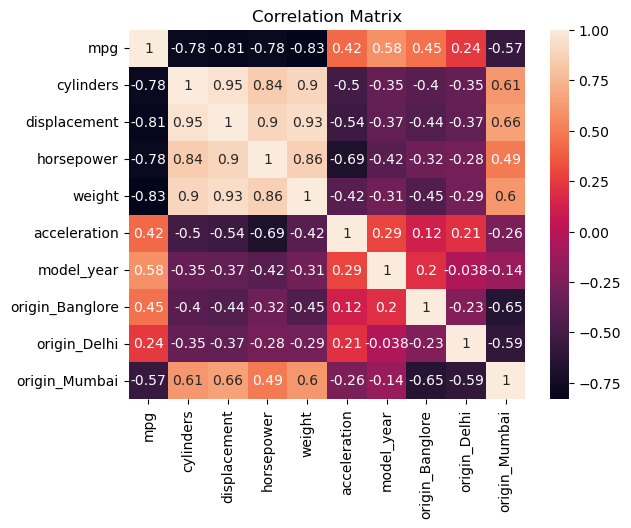

In [15]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

- Here, the variable “mpg”, that is, miles per gallon, has a strong negative correlation with most of the other variables like cylinders, displacement, horsepower and weight. Higher engine displacement and power typically signify lower fuel efficiency, hence this correlation was expected.
  
- The positively correlated variables with each other are cylinders, displacement, horsepower and weight, which signifies that vehicles with larger engines tend to have more cylinders, higher displacement, more horsepower, and greater weight.

- The mpg(-0.42) of the acceleration variable has a moderately negative correlation and moderate positive correlation with the engine-related variables like displacement(0.69) and horsepower (0.69), referring that the larger engines and lower fuel efficiency are the output for vehicles with better acceleration performance.

- The weak correlations include model-year variable with most other variables, suggesting that other characteristics are not strongly influenced by model-year alone.

In all-inclusively, the respective correlation matrix gives insights about the relationships between various vehicle attributes. Also, it can be used to analyse other factors influencing fuel efficiency, performance, and other characteristics in the given dataset.
  

In [16]:
X_drop = data.drop('mpg', axis=1)
X_drop = X_drop.drop({'origin_Banglore','origin_Delhi','origin_Mumbai'}, axis =1)

y_points= data[['mpg']]

In [17]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_drop, y_points, test_size = 0.2, random_state=100)

## 1st model is Linear regression

In [18]:
first_model = LinearRegression()
first_model.fit(X_trains, y_trains)

LinearRegression()

#### Calculation Coeffient for each field or parameter

In [19]:
for col_name, coef in zip(X_trains.columns, first_model.coef_[0]):
    print(f"The coefficient for {col_name} is {coef}")

The coefficient for cylinders is -0.10323705655829536
The coefficient for displacement is 0.005102326170151717
The coefficient for horsepower is -0.008461396038537366
The coefficient for weight is -0.00662342114263519
The coefficient for acceleration is 0.0794060522902448
The coefficient for model_year is 0.7744425588221437


### Cylinders Coefficient (-0.10323705655829259)
 - Here, the Negative coefficient indicates that an increase in the number of cylinders is associated with a decrease in the dependent variable(e.g.., fuel efficiency). This aligns with the general understanding that vehicles with more cylinders tend to have large engines and lower fuel efficiency.

### Displacement Coefficient (0.005102326170151709)
 - Displacement coefficient is positive which suggest that an increase in engine displacement is associated with a slight increase in the dependent variable. This relationship may seem counterintuitive at first, as large displacement engines are typically associated with lower fuel efficiency. However, it is important to note that coefficient is relatively small, and the relationship could be influenced by other factors or interaction in the model.

### Horsepower Coefficient (-0.008461396038537237)
 - The negative coefficient is indicating that an increase in horsepower is related with a decrease in the dependent variable(e.g., fuel efficiency).From this we can understand that vehicles with higher horsepower tend to have larger, more powerful engines, which can negatively impact fuel efficiency.

### Weight Coefficient (-0.006623421142635196)
 - The negative coefficient suggesting that an increase in vehicle weight is linked with a decrease in the dependent variable. This relationship occurred as heavier vehicles generally require more energy to move , that results in lower fuel efficiency.

### Acceleration Coefficient (0.07940605229024499)
 - Here, the positive coefficient indicates that an increase in acceleration is linked with an increase in the dependent variable. This relationship may seem unreasonable, as vehicles with better acceleration performance often have larger, more powerful engines, which can negatively impact fuel efficiency. Considering acceleration will be influenced by other factors, such as vehicle weight and gearing, which will impact the relationship with fuel efficiency.

### Model_year Coefficient (0.774442558822144)
 - The large positive coefficient suggesting that newer model years are related with a significant increase in the dependent variable. This could be due to enhanced engine technology, vehicle design and fuel efficiency standards over time, this leads to better fuel efficiency in newer vehicle models.

In [20]:
intercept_of_model = first_model.intercept_[0]
print("The intercept for our model is", intercept_of_model)

The intercept for our model is -16.32914946207308


In [21]:
first_model.score(X_trains, y_trains)

0.807386453480141

In [22]:
first_model.score(X_tests, y_tests)


0.8053015158403254

The scores of high train and test , that are, 0.81 and 0.81, same for both , this indicates that linear regression model fits the data reasonably well and generalises to unseen data effectively.But also,  potential counterintuitive relationships or multicollinearity issues are suggested by few coefficients.

For example, there is contradictory among the positive coefficient for displacement (0.005) and the negative coefficient for horsepower (-0.008), because higher horsepower is typically the output of vehicles with larger displacements.

Also, a strong influence of newer model years on the dependent variable (likely fuel efficiency) is being suggested by the large positive coefficient for model_year (0.774), potentially overshadowing the effects of other variables.This aligns with the expectation of improved fuel efficiency in newer vehicles due to technological advancements and stricter emission standards.

Lower fuel efficiency is generally the output of the vehicles with more cylinders, higher weight and higher horsepower , this is understood by The negative coefficients for cylinders (-0.103), weight (-0.007), and horsepower (-0.008).

However, the positive coefficient for acceleration (0.079) is counterintuitive, as vehicles with better acceleration often have larger, less fuel-efficient engines. This relationship may be influenced by other factors or non-linear effects.

In allover, the model appears to have a descent fit and further investigation into variable interactions, multicollinearity, and potential non-linear relationships could improve interpretability and model performance.

<Axes: xlabel='acceleration', ylabel='mpg'>

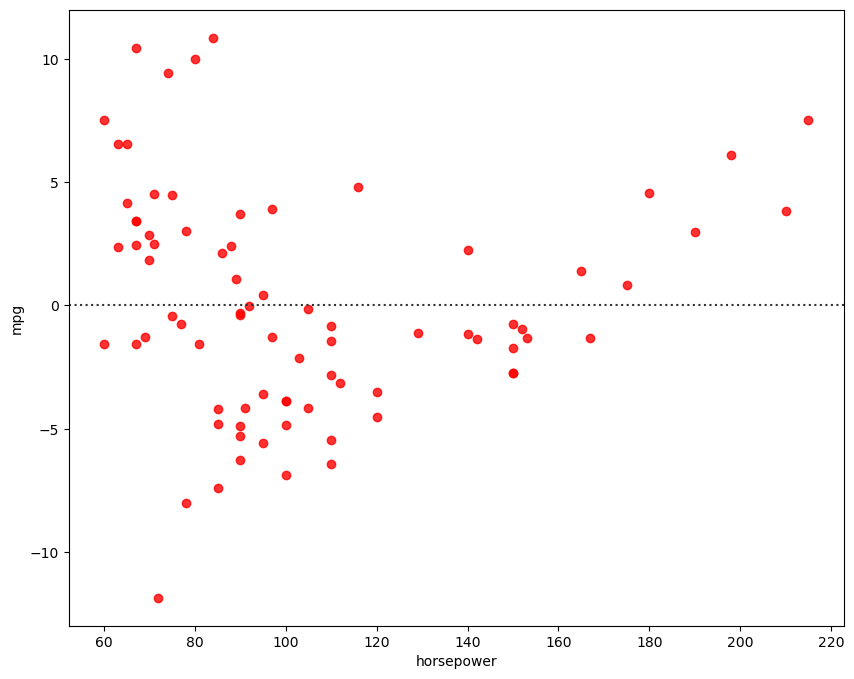

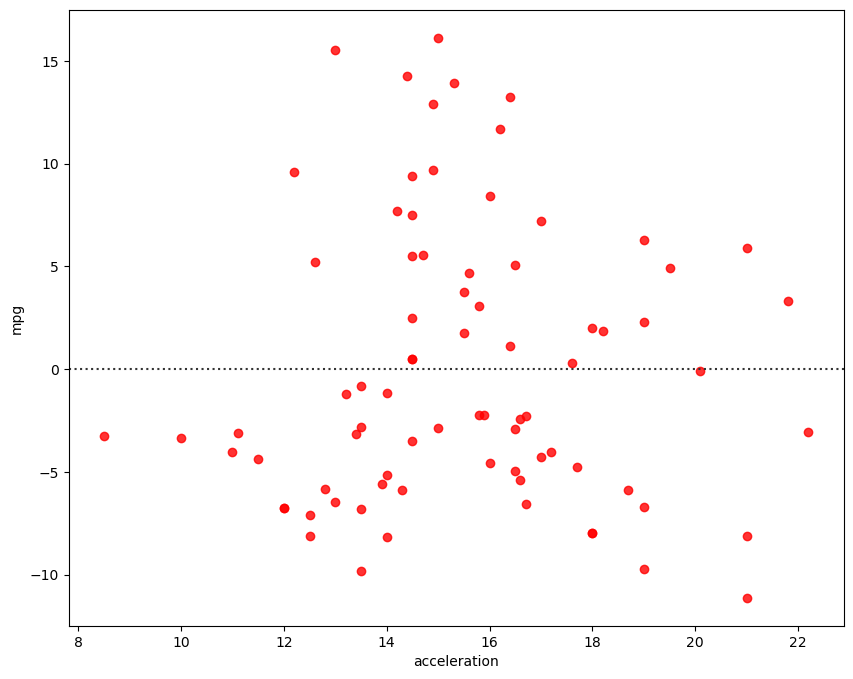

In [23]:
fig = plt.figure(figsize = (10, 8))
sns.residplot(x=X_tests['horsepower'], y=y_tests['mpg'], color='red')

fig = plt.figure(figsize = (10, 8))
sns.residplot(x=X_tests['acceleration'], y=y_tests['mpg'], color='red')

<Axes: xlabel='weight', ylabel='mpg'>

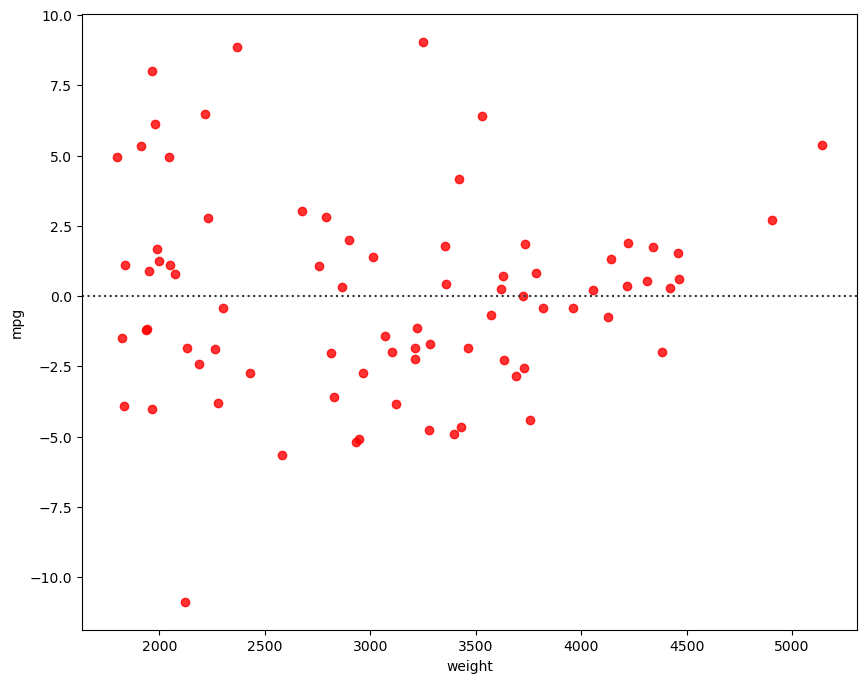

In [24]:
fig = plt.figure(figsize = (10, 8))
sns.residplot(x=X_tests['weight'], y=y_tests['mpg'], color='red')

<Axes: xlabel='displacement', ylabel='mpg'>

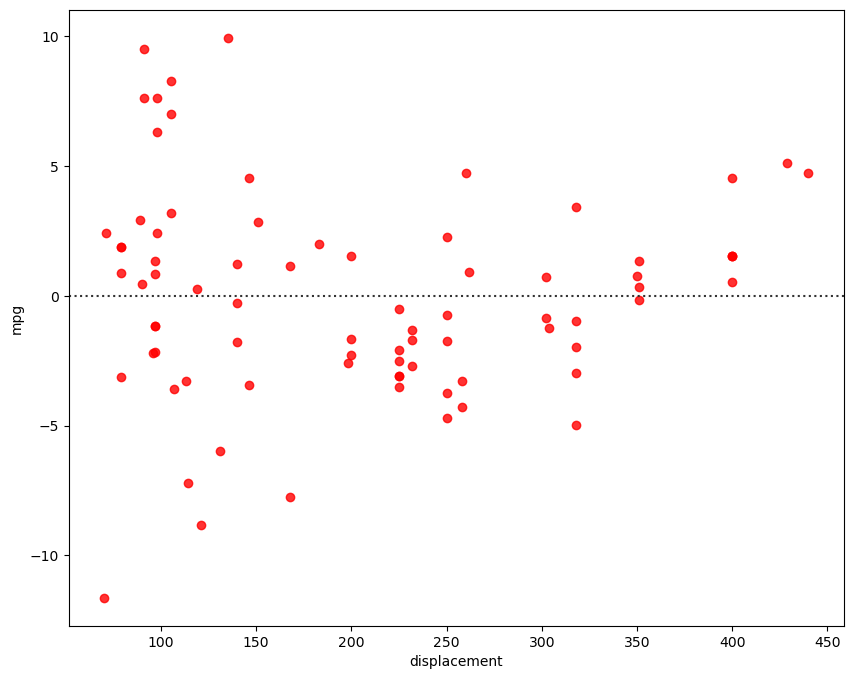

In [25]:
fig = plt.figure(figsize = (10, 8))
sns.residplot(x=X_tests['displacement'], y=y_tests['mpg'], color='red')

<Axes: xlabel='cylinders', ylabel='mpg'>

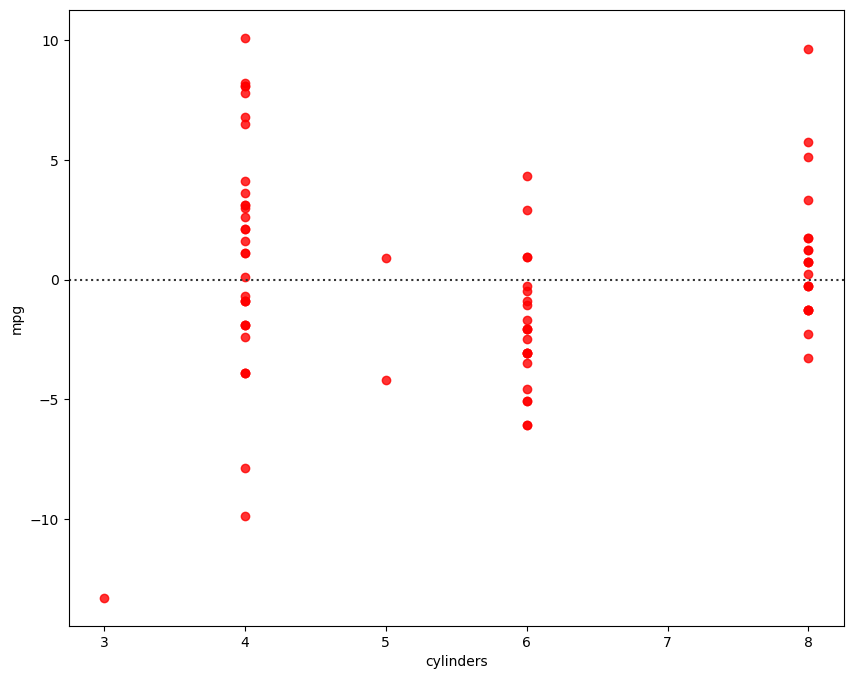

In [26]:
fig = plt.figure(figsize = (10, 8))
sns.residplot(x=X_tests['cylinders'], y=y_tests['mpg'], color='red')

### The model demonstrates that 80% of the variability in Y can be explained by using X_drop

In [27]:
data_trains = pd.concat([X_trains, y_trains], axis=1)
data_trains.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
342,4,135.0,84.0,2385,12.9,81,30.0
331,4,97.0,67.0,2145,18.0,80,33.8
357,4,119.0,100.0,2615,14.8,81,32.9
378,4,105.0,63.0,2125,14.7,82,38.0
306,6,173.0,115.0,2595,11.3,79,28.8


### After the initial linear regression, employing OLS regression ensures standardized estimation of parameters, provides statistical insights like coefficient and hypothesis testing, and facilitates rigorous model evaluation, enhancing interpretability and reliability, so employing ols regression

In [28]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'mpg ~cylinders+displacement+horsepower+weight+acceleration+model_year', data = data_trains).fit()
lm.params

Intercept      -16.329149
cylinders       -0.103237
displacement     0.005102
horsepower      -0.008461
weight          -0.006623
acceleration     0.079406
model_year       0.774443
dtype: float64

In [29]:
import statsmodels.api as sm
print(lm.summary().tables[1])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.3291      5.355     -3.049      0.002     -26.867      -5.792
cylinders       -0.1032      0.386     -0.267      0.789      -0.863       0.657
displacement     0.0051      0.008      0.601      0.548      -0.012       0.022
horsepower      -0.0085      0.016     -0.530      0.596      -0.040       0.023
weight          -0.0066      0.001     -8.594      0.000      -0.008      -0.005
acceleration     0.0794      0.116      0.682      0.496      -0.150       0.308
model_year       0.7744      0.059     13.034      0.000       0.658       0.891


In [30]:
y_pards = first_model.predict(X_tests)

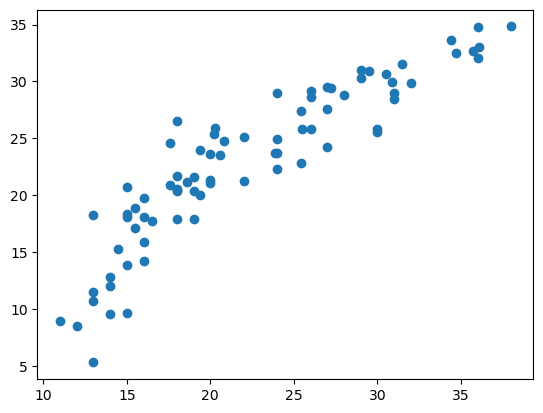

In [31]:
plt.scatter(y_tests['mpg'], y_pards)

Here, the scatter plot appears to give a non-linear relationship between the variables, as a clear linear pattern is not being followed by the data points. There are clusters of points at different regions of the plot, indicating potential non-linear or complex interactions between the variables.

Regardless of this non-linear relationship, a linear regression model was fitted using the formula 'mpg ~ cylinders+displacement+horsepower+weight+acceleration+model_year'.The model coefficients (lm1.params) signifies that features like cylinders, horsepower, weight, and acceleration have negative effects on the dependent variable (likely mpg or fuel efficiency), which aligns with intuition.

Given the non-linear pattern observed in the scatter plot, a more appropriate approach would be to consider non-linear regression models or techniques like polynomial regression, decision trees, or kernel methods, which can better handle complex, non-linear relationships between the variables.